<a href="https://colab.research.google.com/github/singhrishabh23/BTP/blob/main/EP20BTECH11021_DSA_Rishabh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 6}
CPU times: user 27.4 s, sys: 194 ms, total: 27.6 s
Wall time: 27.7 s
rmse value: 0.02742200240781048
r2 score: 0.6857880212811107


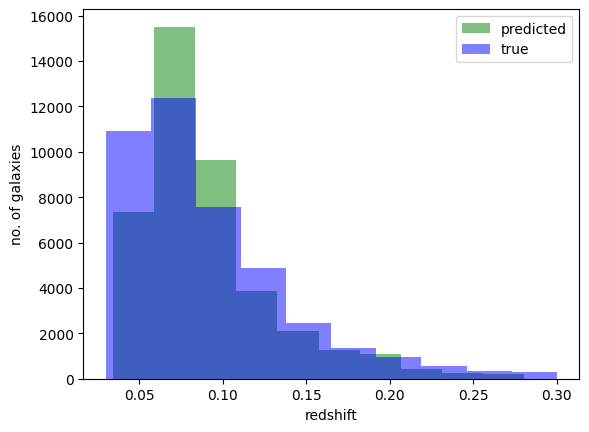

y_test : 0.2999427	y_pretict : 0.28010209376338724


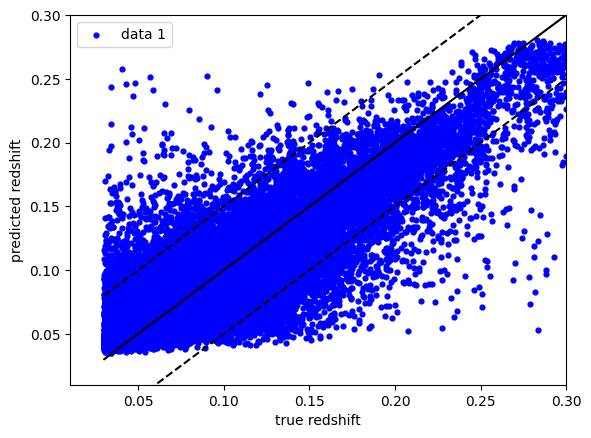

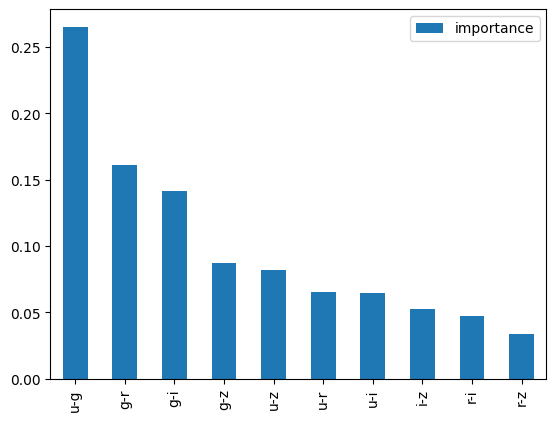

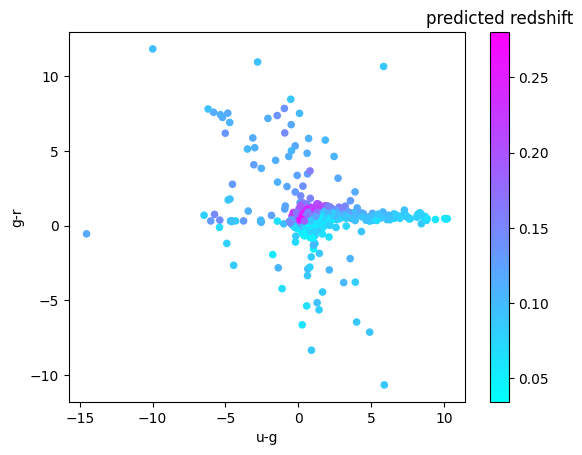

{'scale_pos_weight': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.01}


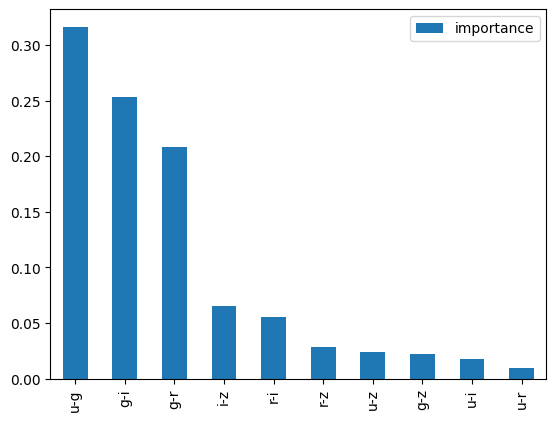

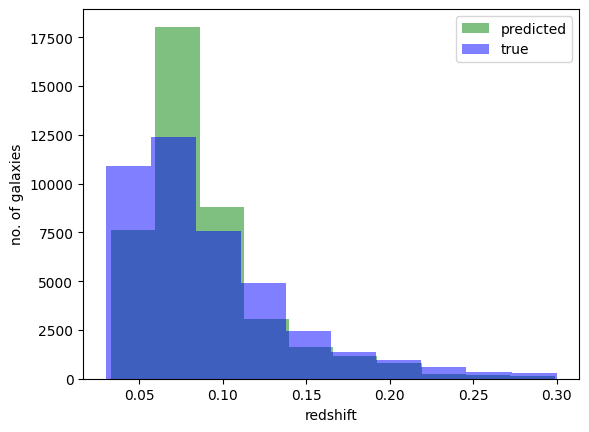

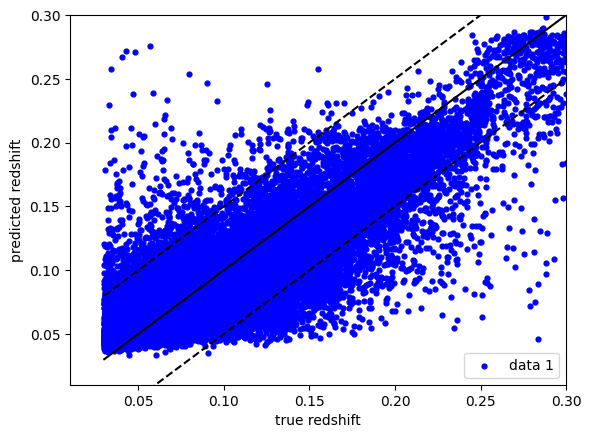

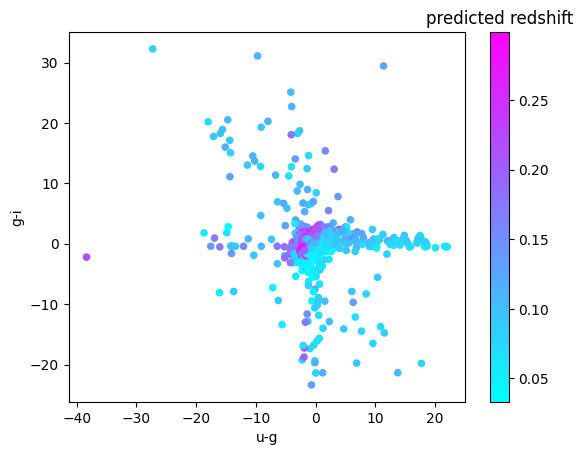

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 6, 'min_samples_leaf': 5}


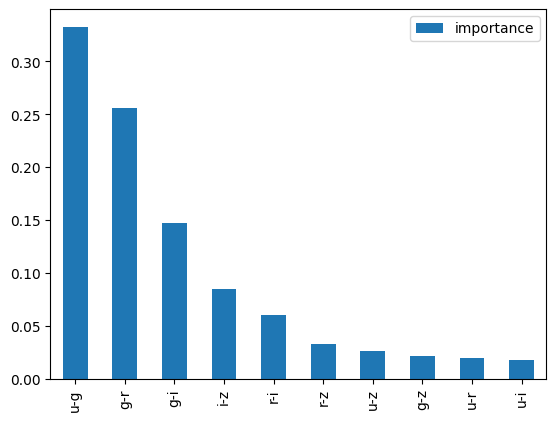

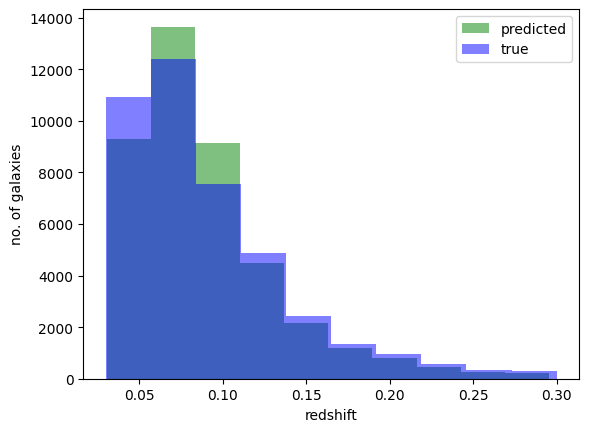

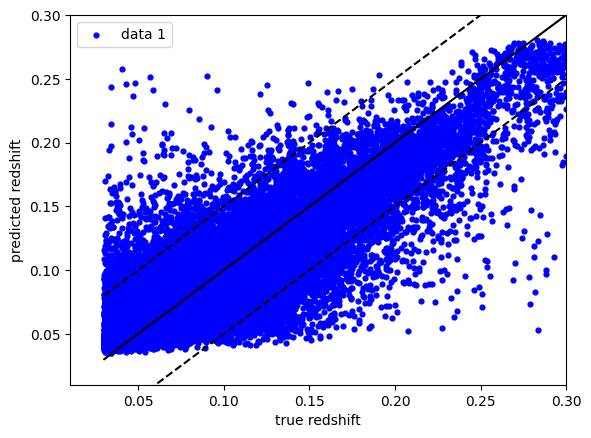

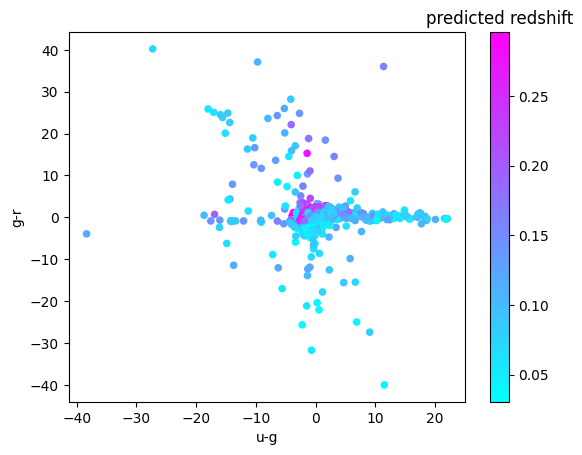

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dsa_data.csv')
df.head()

len(df.columns)

df.drop(df[df["AGN"]==1].index,inplace=True)
df.columns
df = df[['u', 'g', 'r', 'i', 'z', 'z_s']]
df.head()
df["u-g"]=df["u"]-df["g"] 
df["u-r"]=df["u"]-df["r"] 
df["u-i"]=df["u"]-df["i"] 
df["u-z"]=df["u"]-df["z"] 
df["g-r"]=df["g"]-df["r"] 
df["g-i"]=df["g"]-df["i"] 
df["g-z"]=df["g"]-df["z"] 
df["r-i"]=df["r"]-df["i"] 
df["r-z"]=df["r"]-df["z"] 
df["i-z"]=df["i"]-df["z"] 
df.drop(['u', 'g', 'r', 'i', 'z'], inplace=True, axis=1)
df

import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X = df.drop('z_s', axis=1)
Y = df['z_s']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

param_grid = {
'n_estimators': [10, 50, 100],
'min_samples_split': [2, 4, 6, 8],
'min_samples_leaf': [2, 4, 6, 8]
}
CV_etr = RandomizedSearchCV(estimator=ExtraTreesRegressor(), param_distributions=param_grid, cv=3, n_jobs=-1)
CV_etr.fit(x_train, y_train)
print(CV_etr.best_params_)

etr = ExtraTreesRegressor(n_estimators=100, min_samples_leaf=6, min_samples_split=6)
%time etr.fit(x_train,y_train)
y_predict=etr.predict(x_test)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def plot_and_metrics(y_test,y_predict):
  plt.hist(y_predict,color='green',alpha=0.5,label="predicted")
  plt.hist(y_test,color='blue',alpha=0.5,label="true")
# plt.xlim(xmin=8.4,xmax=9.4)
# plt.ylim(ymin=0,ymax=1200)
  plt.ylabel('no. of galaxies')
  plt.xlabel('redshift')
  plt.legend()
  plt.show()
print("rmse value:",(mean_squared_error(y_test,y_predict))**0.5)
print("r2 score:",r2_score(y_test,y_predict))

plot_and_metrics(y_test, y_predict)

min(y_test)

min(y_predict)

print(f'y_test : {max(y_test)}\ty_pretict : {max(y_predict)}')

y_test

y_predict

plt.scatter(y_test, y_predict, color="blue", alpha=1, s=12, label="data 1")
# plt.scatter(y_true_2, y_predict_2, color="green", alpha=0.5, s=12, label="data 2")
plt.plot([0.03, 0.3], [0.03, 0.3], color="black")
plt.plot([0.03, 0.3], [0.08, 0.35], color="black", linestyle='dashed')
plt.plot([0.03, 0.3], [-0.02, 0.25], color="black", linestyle='dashed')
plt.xlim(0.01,0.3)
plt.ylim(0.01, 0.3)
plt.ylabel('predicted redshift')
plt.xlabel('true redshift')
plt.legend()
plt.show()

### if predicted redshift varies from true redshift more than 0.05 then it is showen by the points lying outside the dashed lines, hence taken as outliers 

feature_importances = pd.DataFrame(etr.feature_importances_, index=x_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot.bar() # plotting ranking based on their importance
plt.show()

len(x_train)

plt.scatter(x_test['u-g'], x_test['g-r'], c=y_predict,cmap='cool',s=20)
cbar = plt.colorbar().ax.set_title('predicted redshift')
plt.ylabel('g-r')
plt.xlabel('u-g')
plt.show()

import xgboost
from xgboost import XGBRegressor as xgr
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
scaler.fit(x_test)
x_test_sc = scaler.transform(x_test)
x_test=pd.DataFrame(x_test_sc, columns=x_test.columns)
x_train=pd.DataFrame(x_train_sc, columns=x_test.columns)

param_grid = {
'n_estimators': [80, 100, 120],
'max_depth': [4, 6,],
'learning_rate': [0.01, 0.1, 0.3],
'gamma': [0, 0.01, 0.1],
'scale_pos_weight': [1, 3.5],
'reg_alpha': [0, 1, 5]
}

cv = RandomizedSearchCV(estimator=xgr(), param_distributions=param_grid, cv=3, n_jobs=-1)
cv.fit(x_train, y_train)
print(cv.best_params_)

XGR = xgr(gamma=0, learning_rate=0.1, max_depth=6,
n_estimators=100, reg_alpha=0, scale_pos_weight=1)
XGR.fit(x_train, y_train)
predict = XGR.predict(x_test)

predict = pd.DataFrame(data=predict)
predict

feature_importances = pd.DataFrame(XGR.feature_importances_, index=x_train.columns, columns=[
'importance']).sort_values('importance', ascending=False)
feature_importances.plot.bar() # plotting ranking based on their importance
plt.show()

plot_and_metrics(y_test, predict)

plt.scatter(y_test, predict, color="blue", alpha=1, s=12, label="data 1")
# plt.scatter(y_true_2, y_predict_2, color="green", alpha=0.5, s=12, label="data 2")
plt.plot([0.03, 0.3], [0.03, 0.3], color="black")
plt.plot([0.03, 0.3], [0.08, 0.35], color="black", linestyle='dashed')
plt.plot([0.03, 0.3], [-0.02, 0.25], color="black", linestyle='dashed')
plt.xlim(0.01, 0.3)
plt.ylim(0.01, 0.3)
plt.ylabel('predicted redshift')
plt.xlabel('true redshift')
plt.legend()
plt.show()

plt.scatter(x_test['u-g'], x_test['g-i'], c=predict, cmap='cool', s=20)
cbar = plt.colorbar().ax.set_title('predicted redshift')
plt.ylabel('g-i')
plt.xlabel('u-g')
plt.show()

from sklearn.tree import DecisionTreeRegressor

param_grid = {
'min_samples_split':[2,4,6],
'min_samples_leaf':[1,2,5]
}
cv = RandomizedSearchCV(estimator=DecisionTreeRegressor(), param_distributions=param_grid, cv=3, n_jobs=-1)
cv.fit(x_train, y_train)
print(cv.best_params_)

dt=DecisionTreeRegressor(min_samples_leaf=5,min_samples_split=4).fit(x_train,y_train)
dt_predict=dt.predict(x_test)

feature_importances = pd.DataFrame(dt.feature_importances_, index=x_train.columns, columns=[
'importance']).sort_values('importance', ascending=False)
feature_importances.plot.bar() # plotting ranking based on their importance
plt.show()

plot_and_metrics(y_test, dt_predict)

plt.scatter(y_test, y_predict, color="blue", alpha=1, s=12, label="data 1")
# plt.scatter(y_true_2, y_predict_2, color="green", alpha=0.5, s=12, label="data 2")
plt.plot([0.03, 0.3], [0.03, 0.3], color="black")
plt.plot([0.03, 0.3], [0.08, 0.35], color="black", linestyle='dashed')
plt.plot([0.03, 0.3], [-0.02, 0.25], color="black", linestyle='dashed')
plt.xlim(0.01, 0.3)
plt.ylim(0.01, 0.3)
plt.ylabel('predicted redshift')
plt.xlabel('true redshift')
plt.legend()
plt.show()

plt.scatter(x_test['u-g'], x_test['g-r'], c=dt_predict, cmap='cool', s=20)
cbar = plt.colorbar().ax.set_title('predicted redshift')
plt.ylabel('g-r')
plt.xlabel('u-g')
plt.show()